## Simplicity and Depression - K means

### Objective:

To determine if there is a relationship between higher levels of black and white thinking and higher levels of self-reported depression in psychiatric patients hospitalized for depression.Also apply K means clustering and assign groups for model prediction
為了確定在住院的精神病患者中較高的黑白思維水平和較高的自我報告的抑鬱水平之間是否存在關係，應用K均值聚類並分配group供模型預測

## Context:

It is common for people who tend to think of their reality as a series of black and white events to suffer from depression. Psybersquare, Inc. describes a few examples of this way of thinking by saying that those who suffer from this way of thinking think that, "If things aren't 'perfect,' then they must be "horrible." If your child isn't "brilliant" then he must be 'stupid.' If you're not 'fascinating' then you must be 'boring.'" This can be a difficult way to live since those suffering from this way of thinking may never feel that their reality is “good enough”. 對於傾向於將自己的現實視為一系列黑白事件的人來說，患有抑鬱症是很常見的。 Psybersquare，Inc.描述了這種思維方式的一些示例，說那些遭受這種思維方式折磨的人認為，“如果事情不是'完美的'，那麼他們一定是'可怕的'。如果您的孩子是'可怕的'。” 如果“聰明”，那麼他一定是“愚蠢的”。 如果您不“著迷”，那麼您一定會“無聊”。”這可能是一種艱難的生活方式，因為遭受這種思維方式困擾的人可能永遠不會覺得自己的現實“足夠好”。

## Data Sources:

The data used for this study is from the Ginzberg data frame which is based on psychiatric patients hospitalized for depression. Data is from the book Applied Regression Analysis and Generalized Linear Models, Second Edition by Fox, J. (2008). The dataset includes three variables - simplicity (black and white thinking), fatalism, and depression. The data also includes these variables each adjusted by regression for other variables thought to influence depression. For the purposes of this study, we will use the non-adjusted values. Ginzberg Dataset on Depression display_output(Ginzberg, out_type) simplicity fatalism depression adjsimp adjfatal adjdep
本研究使用的數據來自Ginzberg數據框架，該框架基於因抑鬱而住院的精神病患者。 數據摘自Fox，J.（2008）的第二版《應用回歸分析和廣義線性模型》。 數據集包括三個變量-簡單性（黑白思維），宿命論和沮喪。 數據還包括這些變量，每個變量都通過回歸調整為其他可能影響抑鬱的變量。 出於本研究的目的，我們將使用未調整的值。 抑鬱症的Ginzberg數據集display_output（Ginzberg，out_type）簡單宿命論抑鬱症adjsimp adjfatal adjdep 

Here, "Black and white thinking" is referred as "Simplicity"

Data File: Ginzberg.txt Source: Personal communication from Georges Monette, Department of Mathematics and Statistics, York University, with the permission of the original investigator.

Variables:

simplicity: Measures subject's need to see the world in black and white.簡單性：衡量對象觀看黑白世界的需求。
fatalism: Fatalism scale. (the belief that all events are predetermined and therefore inevitable) 宿命論：宿命論量表。 （相信所有事件都是預先確定的，因此是不可避免的）
depression: Beck self-report depression scale 抑鬱：貝克自我報告抑鬱量表
adjsimplicity: Adjusted Simplicity: Simplicity adjusted (by regression) for other variables thought to influence depression.鄰近性：調整後的簡潔性：對其他影響抑鬱症的變量（通過回歸）調整了簡潔性。
adjfatalism: Adjusted Fatalism. adjfatalism：調整後的宿命論。
adjdepression: Adjusted Depression. adjdepression：調整後的抑鬱症。 

Note: These scales are predefined in psycology and is calcuated for every individual using a set of questions which they have to answer

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Numerical libraries
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns
import pandas as pd

# importing ploting libraries
from matplotlib import pyplot as plt

# importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

In [3]:
# reading the CSV file into pandas dataframe
data = pd.read_csv('Depression.csv')

In [4]:
data.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [5]:
# Remove id since it is redundant
data.drop('id', axis=1, inplace=True)

In [6]:
data.head()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simplicity  82 non-null     float64
 1   fatalism    82 non-null     float64
 2   depression  82 non-null     float64
 3   adjsimp     82 non-null     float64
 4   adjfatal    82 non-null     float64
 5   adjdep      82 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


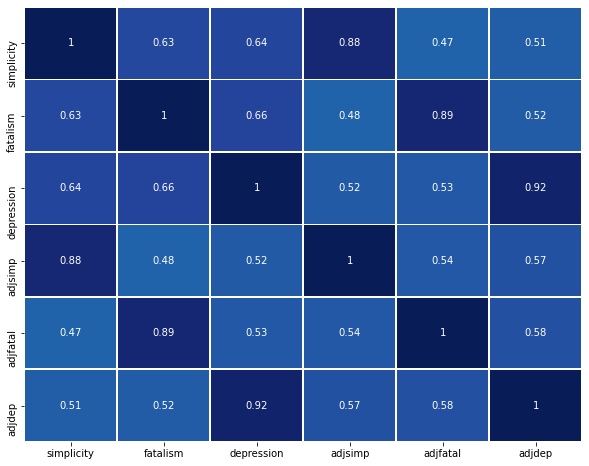

In [10]:
#--------------------Heat map to identify highly correlated variables------------------
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
           annot = True,
           linewidth = 0.7,
           center = 0,
           cbar = False,
           cmap = 'YlGnBu')
plt.show()

In [16]:
data.describe().transpose().round(2)
#transpos-行列倒轉
#round(2)-取小數2位

,count,mean,std,min,25%,50%,75%,max
simplicity,82.0,1.0,0.5,0.25,0.66,0.88,1.27,2.85
fatalism,82.0,1.0,0.5,-0.06,0.56,0.98,1.39,2.22
depression,82.0,1.0,0.5,0.47,0.57,0.82,1.37,2.25
adjsimp,82.0,1.0,0.5,0.24,0.70,0.97,1.20,2.95
adjfatal,82.0,1.0,0.5,0.03,0.73,0.92,1.30,2.25
adjdep,82.0,1.0,0.5,0.23,0.60,0.97,1.26,2.79


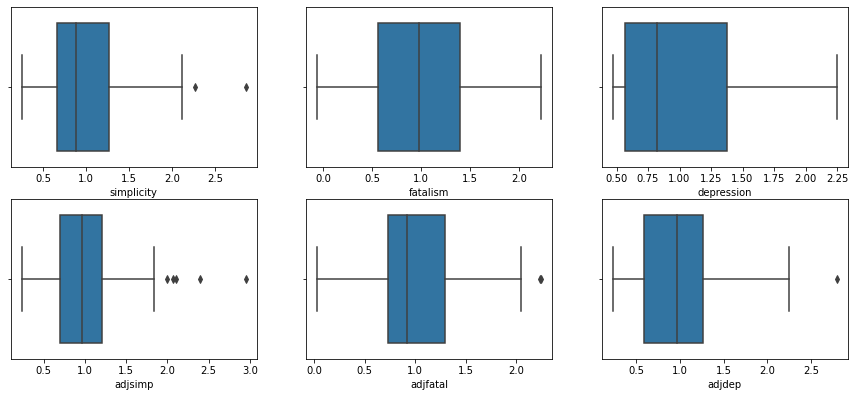

In [17]:
#--Check Outliers--
plt.figure(figsize=(15,10))
pos = 1
for i in data.columns:
    plt.subplot(3,3,pos)
    sns.boxplot(data[i])
    pos += 1

In [19]:
c=list(data.columns)
display(col_names)

['simplicity', 'fatalism', 'depression', 'adjsimp', 'adjfatal', 'adjdep']

In [20]:
for i in col_names:
    q1, q2, q3 = data[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    lower_cap=q1-1.5*IQR
    upper_cap=q3+1.5*IQR
    data[i]=data[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

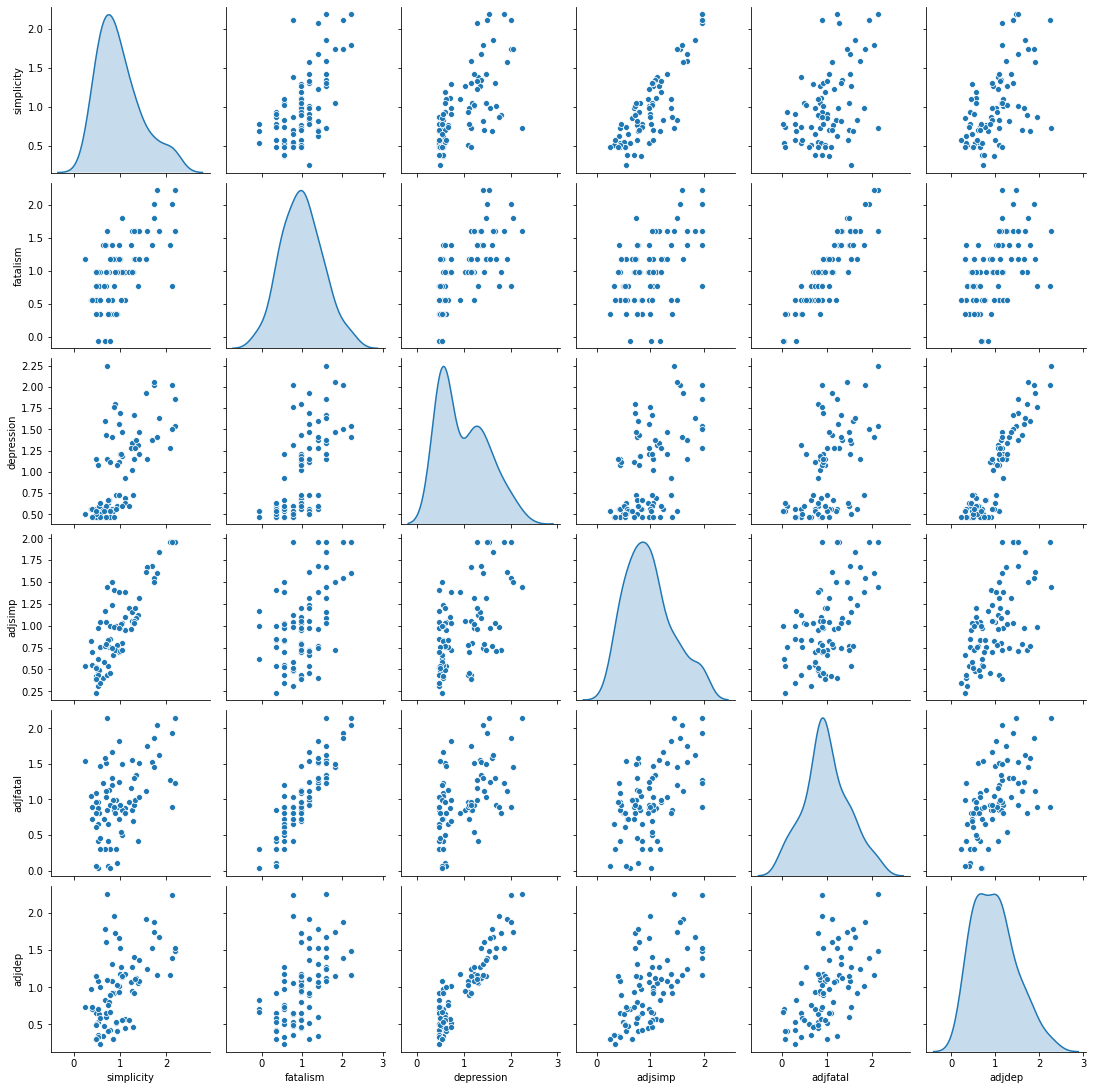

In [21]:
import seaborn as sns
sns.pairplot(data, diag_kind='kde')

In [22]:
## Scale the data

# Remove three variables
data.drop(columns = {'simplicity', 'fatalism','depression'}, inplace=True)

In [23]:
data.head()

,adjsimp,adjfatal,adjdep
0,0.75934,0.10673,0.41865
1,0.72717,0.99915,0.51688
2,0.62176,0.03811,0.70699
3,0.83522,0.42218,0.65639
4,0.47697,0.81423,0.53518


In [24]:
from scipy.stats import zscore

data_z = data.apply(zscore)

data_z.head()

,adjsimp,adjfatal,adjdep
0,-0.501853,-1.813141,-1.205908
1,-0.575313,0.002917,-0.999865
2,-0.816015,-1.952782,-0.601098
3,-0.328581,-1.171207,-0.707234
4,-1.146642,-0.373392,-0.961480


<b> Cluster Input </b>

1. n_clusters - int, default=8
   - The number of clusters to form as well as the number of centroids to generate.形成的簇數以及生成的質心數
   

2. n_init- int, default=10
   - Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.k均值算法將在不同質心種子下運行的次數, 就慣性而言，最終結果將是n_init個連續運行的最佳輸出。 
   
   

3. max_iter- int, default=300
   - Maximum number of iterations of the k-means algorithm for a single run. 單次運行的k均值算法的最大迭代次數。
   


4. random_state - int, RandomState instance, default=None
   - Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. 確定質心初始化的隨機數生成。 使用整數使隨機性具有確定性。 

1. cluster_centers_  - ndarray of shape (n_clusters, n_features)
Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.


2. labels_   - ndarray of shape (n_samples,)
Labels of each point


3. inertia_  - float
Sum of squared distances of samples to their closest cluster center.


4. n_iter_  - int
Number of iterations run.

In [28]:
# List to store cluster and intra cluster distance

clusters = []
inertia_vals = []

# Since creating one cluster is similar to observing the data as a whole, 
# multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve

for k in range(1,10,1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=7, n_jobs=10)
    model.fit(data_z)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

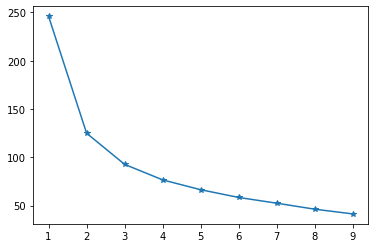

In [29]:
# plot the inertia vs K values 繪製慣性與K值
plt.plot(range(1,10,1), inertia_vals, marker='*')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score

for i in range(1,9,1):
    
    print('-----------------------------')
    print(clusters[i])
    print("Silhouette_score: ", silhouette_score(data_z, clusters[i].predict(data_z)))

-----------------------------
KMeans(n_clusters=2, n_jobs=10, random_state=7)
Silhouette_score:  0.40099183297222984
-----------------------------
KMeans(n_clusters=3, n_jobs=10, random_state=7)
Silhouette_score:  0.3191854112351335
-----------------------------
KMeans(n_clusters=4, n_jobs=10, random_state=7)
Silhouette_score:  0.2754646668550391
-----------------------------
KMeans(n_clusters=5, n_jobs=10, random_state=7)
Silhouette_score:  0.2816887349871598
-----------------------------
KMeans(n_clusters=6, n_jobs=10, random_state=7)
Silhouette_score:  0.274954119691221
-----------------------------
KMeans(n_clusters=7, n_jobs=10, random_state=7)
Silhouette_score:  0.25210720372644757
-----------------------------
KMeans(n_jobs=10, random_state=7)
Silhouette_score:  0.26048840607982754
-----------------------------
KMeans(n_clusters=9, n_jobs=10, random_state=7)
Silhouette_score:  0.27461399903019457


In [31]:
# Set the value of k=5
kmeans = KMeans(n_clusters=5, n_init=15, random_state=2345)

In [32]:
kmeans.fit(data_z)

KMeans(n_clusters=5, n_init=15, random_state=2345)

In [33]:
centroids = kmeans.cluster_centers_

In [34]:
centroids

array([[-1.01528338, -0.07349594, -0.68784398],
       [ 1.74651248,  1.25938248,  1.3396362 ],
       [ 0.10405992,  0.62211274,  0.72351431],
       [-0.70786915, -1.56913797, -1.07812689],
       [ 0.11900971, -0.42443148, -0.26238556]])

In [35]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(data_z))

In [36]:
print(centroid_df)

    adjsimp  adjfatal    adjdep
0 -1.015283 -0.073496 -0.687844
1  1.746512  1.259382  1.339636
2  0.104060  0.622113  0.723514
3 -0.707869 -1.569138 -1.078127
4  0.119010 -0.424431 -0.262386


In [39]:
## creating a new dataframe only for labels and converting it into categorical variable 
# 創建僅用於標籤的新數據框並將其轉換為分類變量

df_labels = pd.DataFrame(kmeans.labels_, columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [40]:
# Joining the label dataframe with the data frame. 將標籤數據框與數據框連接
df_labeled = data.join(df_labels)

In [41]:
#--Calculating the count of data points percluster 計算每個集群的數據點數 
df_labeled['labels'].value_counts()

4    21
0    19
2    18
1    13
3    11
Name: labels, dtype: int64

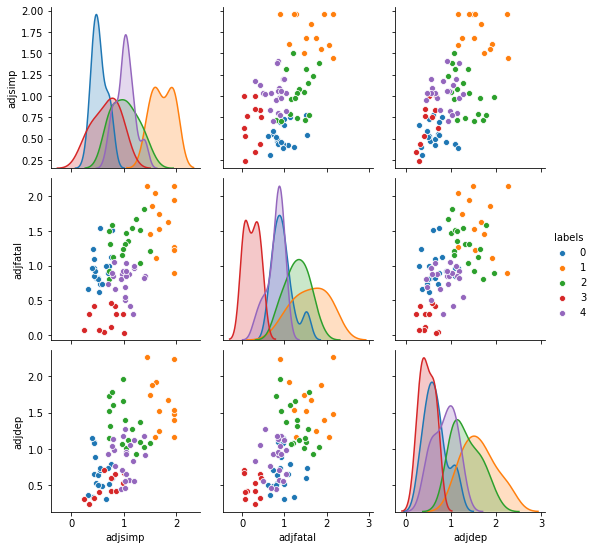

In [42]:
sns.pairplot(df_labeled, hue='labels')

In [44]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
PrincipalComponents = pca.fit_transform(data)
PrincipalDF = pd.DataFrame(data = PrincipalComponents,
                          columns = ['pc1','pc2'])

PrincipalDF['cluster']=kmeans.labels_
PrincipalDF.head()


,pc1,pc2,cluster
0,-1.001608,0.357854,3
1,-0.415620,-0.318873,0
2,-0.941994,0.484668,3
3,-0.627497,0.245688,3
4,-0.647193,-0.267423,0


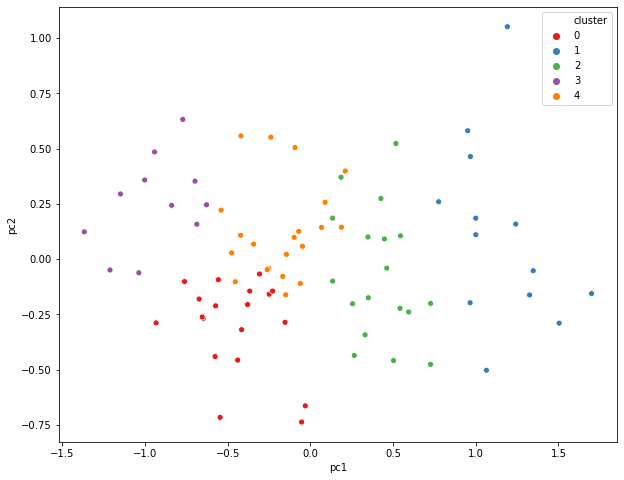

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=PrincipalDF.pc1, y=PrincipalDF.pc2, hue=PrincipalDF.cluster, palette='Set1')

In [47]:
df_labeled.head()

,adjsimp,adjfatal,adjdep,labels
0,0.75934,0.10673,0.41865,3
1,0.72717,0.99915,0.51688,0
2,0.62176,0.03811,0.70699,3
3,0.83522,0.42218,0.65639,3
4,0.47697,0.81423,0.53518,0


In [50]:
df_labeled.groupby('labels').mean()

,adjsimp,adjfatal,adjdep
labels,,,
0,0.534495,0.961601,0.665634
1,1.743958,1.616584,1.632224
2,1.024685,1.303426,1.338491
3,0.669120,0.226635,0.479569
4,1.031232,0.789149,0.868469


In [55]:
df_labeled.groupby('labels').mean().round(2).reset_index()

,labels,adjsimp,adjfatal,adjdep
0,0,0.53,0.96,0.67
1,1,1.74,1.62,1.63
2,2,1.02,1.30,1.34
3,3,0.67,0.23,0.48
4,4,1.03,0.79,0.87


The above result is important to name clusters when presenting the clusters to different stakeholders. This presents an overall scenario of how different clusters are different from the other.
當將群集呈現給不同的涉眾時，以上結果對於命名群集很重要。 這提供了一個總體場景，說明不同的群集彼此之間如何不同。

In [56]:
# try with K=3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

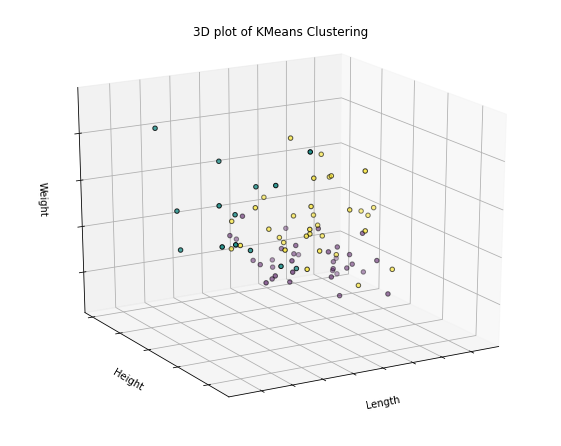

In [64]:
# 3D plots of clusters

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig, rect=[0,0, .95, 1], elev=20, azim=60)
k3_model = KMeans(3)
k3_model.fit(data_z)
labels = k3_model.labels_
ax.scatter(data_z.iloc[:, 0], data_z.iloc[:, 1], data_z.iloc[:, 2], c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')

ax.set_title('3D plot of KMeans Clustering')

In [67]:
# Let us try with K = 3 (to demonstrate the 3d plot)

final_model = KMeans(3)
final_model.fit(data)
prediction = final_model.predict(data)

## Append the prediction
data['GROUP'] = prediction
print('Group Assigned : \n')
data['adjsimp'].corr(data['adjdep'])

Group Assigned : 



0.5970389556863755

The correlation coefficient above indicates that the relationship between black and white thinking and depression can be considered moderate and positive. This means that we can see a clear relationship between black and white thinking and Depression, although the relationship is not perfect. The fact that the correlation coefficient is positive, indicates that higher levels of black and white thinking is associated with higher levels of depression
上面的相關係數表明，黑白思維與抑鬱之間的關係可以被認為是中等和積極的。 這意味著我們可以看到黑白思維與抑鬱之間的清晰關係，儘管這種關係並不完美。 **相關係數為正的事實表明，較高水平的黑白思維與較高水平的抑鬱症相關** 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

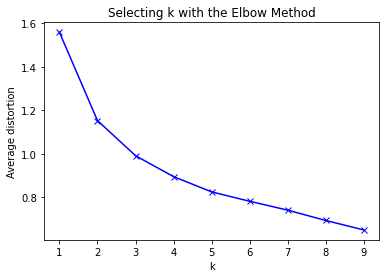

In [70]:
## Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k, random_state=7, n_jobs=10)
    model.fit(data_z)
    prediction=model.predict(data_z)
    meanDistortions.append(sum(np.min(cdist(data_z, model.cluster_centers_, 'euclidean'), axis=1)) /data_z.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')